# Calibration of NGC 3998

In [1]:
# Header Block. You should NOT rerun this block if you have not restarted the kernel.
from apercal import lib
lib.setup_logger('info', logfile='/home/frank/ngc3998-tutorial.log')
import pylab as pl
%matplotlib inline
import os
from apercal import calibrate

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/frank/ngc3998-tutorial.log


Setup logger with lib.setup_logger()


### The Calibration Classes

``calibrate.crosscal`` and ``calibrate.wselfcal`` are classes that wrap commonly used **``MIRIAD``** tasks and processes.

You can define a crosscal or wselfcal object in your notebook by the following simple command: 

In [2]:
ccal = calibrate.crosscal()
scal = calibrate.wselfcal()

### The Source Class
The ``calibrate.source`` class is just a simple container that keeps paths and filenames for the data you're working on. Aggregated methods and functions can loop over lists of sources, as defined here. 

In this convention, ``path`` is defined as the full path to your working directory, i.e. the directory in which you keep all your results. 

Correspondingly, ``pathtodata`` is defined as the full path to the raw data, in MS or UVFITS format. This can be the same as path, but this can be useful if you have data stored on a mounted disk, for example. In this tutorial, it is the same as path and the ``update()`` method copies the path over to pathtodata.

In [3]:
path = '/home/frank/tutorials/tutorial-ngc3998/'

cal1 = calibrate.source()
cal1.path = path
cal1.uvf = '11102057_S0_T0.UVF'
cal1.vis = 'cal1.uv'
cal1.update()

cal2 = calibrate.source()
cal2.path = path
cal2.uvf = '11102059_S0_T0.UVF'
cal2.vis = 'cal2.uv'
cal2.update()

src1 = calibrate.source()
src1.path = path
src1.uvf = '11102058_S0_T0.UVF'
src1.vis = 'src1.uv'
src1.update()

src2 = calibrate.source()
src2.path = path
src2.uvf = '11102058_S0_T1.UVF'
src2.vis = 'src2.uv'
src2.update()

src = calibrate.source()
src.path = path
src.vis = 'src.uv'
src.update()

s0 = calibrate.source()
s0.path = path
s0.vis = 'src.uv_chan0'
s0.update()


### Basic Data Import Block

The following block contains the commonly used commands that you would use to import UVFITS data.

The MIRIAD tasks are now sub-classes in the crosscal class, and their own go(), inp() and help() methods can easily be accessed. 

In [7]:
# First, define the source that you want to import
source = src2 # Just change this one.

# Send this to the crosscal object. 

ccal.source = source

# Now we move into the working directory
ccal.setup()

# Setup the WSRTFITS parameters. The inp() method simply shows you the variables that have already been set. 
ccal.wsrtfits.inp()
ccal.wsrtfits.in_ = source.uvf
ccal.wsrtfits.out = source.vis+'.temp'

# The go() method always returns the task output as a list of text.
output = ccal.wsrtfits.go(rmfiles=True)

# Do
ccal.attsys.vis = source.vis+'.temp'
ccal.attsys.out = source.vis
ccal.attsys.go(rmfiles=True)

# Replace the old vis with this new file
#lib.basher('mv '+source.vis+'.temp '+source.vis)
lib.basher('rm -r '+source.vis+'.temp')
#ccal.puthd()
ccal.puthd.in_ = source.vis+'/restfreq'
ccal.puthd.value ='1.420405752'
ccal.puthd.go()
ccal.puthd.in_ = source.vis+'/interval'
ccal.puthd.type = 'double'
ccal.puthd.value= '1.0'
ccal.puthd.go()

#ccal.uvflag()
# Flag antenna 6, autocorrelations and for shadowing
select = ['auto', 'an(6)', 'shadow(25)']
ccal.uvflag.vis = source.vis
ccal.uvflag.flagval = 'flag'
for s in select:
    ccal.uvflag.select = s
    ccal.uvflag.go()


crosscal - WARNING : You have now moved into /home/frank/tutorials/tutorial-ngc3998/
crosscal - WARNING : All outputs will be relative to this path.
miriad wsrtfits - INFO : velocity=optbary, task=wsrtfits, out=src1.uv.temp, in_=11102058_S0_T0.UVF, op=uvin
miriad wsrtfits - DEBUG : Cleanup - files will be DELETED.
masher - INFO : wsrtfits velocity=optbary in_=11102058_S0_T1.UVF op=uvin out=src2.uv.temp 
basher - DEBUG : wsrtfits velocity=optbary in_=11102058_S0_T1.UVF op=uvin out=src2.uv.temp 
basher - DEBUG : Command = wsrtfits velocity=optbary in_=11102058_S0_T1.UVF op=uvin out=src2.uv.temp 
basher - DEBUG : 
wsrtfits: version 1.3.1 21-Jul-04
 11102058_S0_T1.UVF                                                                                                              
Assuming systemp=30
Assuming jyperk=8
Reading AIPS TY table
Reading AIPS AN table
 freqref    1415406987.6099997     
Decrementing times for configration  1 by  0.24 seconds (UTC-UT1).
 Mount type :           1
Readin

In [8]:
# MFCAL
ccal.mfcal.vis = cal1.vis
ccal.mfcal.interval = 10000
ccal.mfcal.edge = '10,50'
ccal.mfcal.refant = 2
output = ccal.mfcal.go()

masher - INFO : mfcal vis=cal1.uv edge=10,50 refant=2 interval=10000 
basher - DEBUG : mfcal vis=cal1.uv edge=10,50 refant=2 interval=10000 
basher - DEBUG : Command = mfcal vis=cal1.uv edge=10,50 refant=2 interval=10000 
basher - DEBUG : 
MfCal: version 1.1 11-jan-10
Selecting parallel-hand polarisations
Reading the data ...
wsrt
Number correlations accepted: 4511520
Number of frequency bands/settings: 1
Number of polarisations selected: 2
Number of solution intervals: 1
Number of passband solution intervals: 1
Initialising ...
Using known frequency variation of 3c147
Generating initial solution estimate ...
Doing solution refinement ...
Iter= 1, Solution Error:  0.180
Iter= 2, Solution Error:  0.000
Saving solution ...

basher - ERROR : ### Warning [mfcal]:  Correlations flagged or edge-rejected: 1079520

basher - DEBUG : Returning output.
miriad mfcal - INFO : Completed.


In [9]:
# UVCAT / UVCAL

ccal.source = src
ccal.setup()

ccal.uvcat.vis = src1.vis+','+src2.vis
ccal.uvcat.out = src.vis
output = ccal.uvcat.go()

crosscal - WARNING : You have now moved into /home/frank/tutorials/tutorial-ngc3998/
crosscal - WARNING : All outputs will be relative to this path.
masher - INFO : uvcat vis=src1.uv,src2.uv out=src.uv 
basher - DEBUG : uvcat vis=src1.uv,src2.uv out=src.uv 
basher - DEBUG : Command = uvcat vis=src1.uv,src2.uv out=src.uv 
basher - DEBUG : 
UvCat: version 6-jun-2012

basher - ERROR : ### Fatal Error [uvcat]:  Error opening src.uv, in UVOPEN(new): File exists

basher - DEBUG : Returning output.
miriad uvcat - INFO : Completed.


In [10]:
# GPCOPY
ccal.gpcopy.vis = cal1.vis
ccal.gpcopy.out = src.vis
output = ccal.gpcopy.go()

masher - INFO : gpcopy vis=cal1.uv out=src.uv 
basher - DEBUG : gpcopy vis=cal1.uv out=src.uv 
basher - DEBUG : Command = gpcopy vis=cal1.uv out=src.uv 
basher - DEBUG : 
GpCopy: version 23-Jan-07
Copying gain table
Interpolation tolerance set to (minutes): 720.00
Copying bandpass table

basher - DEBUG : Returning output.
miriad gpcopy - INFO : Completed.


In [11]:
# UVLIN
ccal.uvlin.vis = src.vis
ccal.uvlin.chans = '10,200,250,400,650,900'
ccal.uvlin.order = 4
ccal.uvlin.mode = 'chan0'
ccal.uvlin.out = s0.vis
output = ccal.uvlin.go()

masher - INFO : uvlin vis=src.uv out=src.uv_chan0 mode=chan0 chans=10,200,250,400,650,900 order=4 
basher - DEBUG : uvlin vis=src.uv out=src.uv_chan0 mode=chan0 chans=10,200,250,400,650,900 order=4 
basher - DEBUG : Command = uvlin vis=src.uv out=src.uv_chan0 mode=chan0 chans=10,200,250,400,650,900 order=4 
basher - DEBUG : 
UvLin: version 1.0 24-Jan-07
Applying bandpass corrections to src.uv
Applying gain corrections to src.uv

basher - ERROR : ### Fatal Error [uvlin]:  Error opening src.uv_chan0, in UVOPEN(new): File exists

basher - DEBUG : Returning output.
miriad uvlin - INFO : Completed.


In [4]:
ccal.source = cal2
ccal.setup()

crosscal - WARNING : You have now moved into /home/frank/tutorials/tutorial-ngc3998/
crosscal - WARNING : All outputs will be relative to this path.


## Deep Image

In [6]:
# scal.invert is attached to the invert task.
# Defaults for the map and beam parameters are set in the next block
# Change parameters as follows:
scal.plot = True
scal.source = s0
scal.output = 'output'

scal.invert.robust = -2.
scal.invert.slop = '0.5'
scal.invert.imsize ='1500'
scal.invert.cell = 4
scal.invert.options='mfs,double'
scal.invert.select = '-uvrange(0,0.5)'

# scal.clean is attached to the clean task 
# Defaults for the map, beam and model fields are set in the next block
# Change parameters as follows:
scal.clean.cutoff = 5e-4
scal.clean.niters=100000

# scal.maths is attached to the MATHS task
# Parameters are shown here for illustration. 
# Change parameters as follows:
scal.maths = lib.miriad('maths')
scal.maths.exp = 'map'
scal.maths.mask = 'map.gt.1e-3'
scal.maths.out = 'mask'

# scal.restor is attached to the restor task
# Change parameters as follows:
scal.restor.mode = 'clean'

# scal.imstat is attached to the imstat task

# SelfCal and Image Cycle Settings
# Number of Major Cycles
scal.num_selfcal = 2
# Number of minor cycles - The number of image cycles
scal.num_clean = 5

# The mask cutoffs will go from immax/cmin...
scal.cmin = 10
# to a minimum of imax/cmax
scal.cmax = 2000
# If linear is True, then the mask cutoffs will decrease linearly.
# If linear is False, then the mask cutoffs will be decrease logarithmically, 
# with log10(cmin) and log10(cmax) as the minimum and maximum denominators respectively.
scal.linear = False 
# This is how much deeper than the mask cutoff that we will clean to.
scal.d = 10.
# Cleaning and masking will stop at 7*theoretical rms 
scal.nsigma = 7 
# dummy value for the image maximum
scal.immax = 0.0
scal.rmgains = False # Remove gains from vis file.

scal.setup()

scal.deep_image()

selfcal - WARNING : You have now moved into /home/frank/tutorials/tutorial-ngc3998//output
selfcal - WARNING : All outputs will be relative to this path.
selfcal - INFO : Making symbolic/soft link to your visibility file
basher - ERROR : ln: failed to create symbolic link `./src.uv_chan0': File exists

masher - INFO : obsrms jyperk=150 tsys=50 inttime=720.0 bw=20 coreta=0.88 theta=15 freq=1.4 antdiam=25 nants=11 
basher - ERROR : ### Informational [obsrms]:  inttime in minutes

miriad obsrms - INFO : Completed.
deep_image - INFO : Mask threshold: IMAX/10.0
masher - INFO : invert map=map slop=0.5 beam=beam cell=4 vis=src.uv_chan0 robust=-2.0 options=mfs,double select=-uvrange(0,0.5) imsize=1500 
basher - ERROR : ### Warning [invert]:  Visibilities rejected: 21802

miriad invert - INFO : Completed.
masher - INFO : imstat in_=map options=nohead,guaranteespaces 
miriad imstat - INFO : Completed.
deep_image - INFO : IMMAX = 0.17 Jy
deep_image - INFO : TRMS = 0.0003822 Jy
masher - INFO : mat

## SelfCal

selfcal - WARNING : You have now moved into /home/frank/tutorials/tutorial-ngc3998//selfcal_output_2
selfcal - WARNING : All outputs will be relative to this path.
selfcal - INFO : Making symbolic/soft link to your visibility file
basher - DEBUG : ln -s /home/frank/tutorials/tutorial-ngc3998//src.uv_chan0
basher - ERROR : ln: failed to create symbolic link `./src.uv_chan0': File exists

basher - DEBUG : Returning output.
masher - INFO : obsrms jyperk=150 tsys=50 inttime=720.0 bw=20 coreta=0.88 theta=15 freq=1.4 antdiam=25 nants=11 
basher - DEBUG : obsrms jyperk=150 tsys=50 inttime=720.0 bw=20 coreta=0.88 theta=15 freq=1.4 antdiam=25 nants=11 
basher - DEBUG : Command = obsrms jyperk=150 tsys=50 inttime=720.0 bw=20 coreta=0.88 theta=15 freq=1.4 antdiam=25 nants=11 
basher - DEBUG : 
OBSRMS: version 28-SEP-2007
 tsys  jyperk  freq   lambda    deltav     bw  inttime   nants    theta    coreta   rmsphase
   50.   9.4    1.40   214.14  4282.75   20.00  720.00    11.   15.0   15.0  0.88    

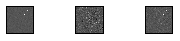

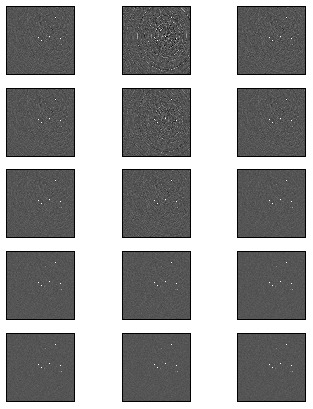

In [6]:
# scal.invert is attached to the invert task.
# Defaults for the map and beam parameters are set in the next block
# Change parameters as follows:

scal.source = s0
scal.output = 'selfcal_output_2'

scal.invert.robust = -2

scal.selfcal.select = '-uvrange(0,0.5)'
scal.selfcal.options = 'mfs,phase'
scal.selfcal.refant = '2'
scal.selfcal.interval = 2
scal.selfcal.clip = 1e-6

# scal.clean is attached to the clean task 
# Defaults for the map, beam and model fields are set in the next block
# Change parameters as follows:
scal.clean.cutoff = 5e-4
scal.clean.niters=100000

# scal.maths is attached to the MATHS task
# Parameters are shown here for illustration. 
# Change parameters as follows:

# scal.restor is attached to the restor task
# Change parameters as follows:
scal.restor.mode = 'clean'

# scal.imstat is attached to the imstat task

# SelfCal and Image Cycle Settings
# Number of Major Cycles
scal.num_major = 3
# Number of minor Cycles
scal.num_minor = 3

# The mask cutoffs will go from immax/cmin...
scal.cmin = 3
# to a minimum of imax/cmax
scal.cmax = 30
# If linear is True, then the mask cutoffs will decrease linearly.
# If linear is False, then the mask cutoffs will be decrease logarithmically, 
# with log10(cmin) and log10(cmax) as the minimum and maximum denominators respectively.
scal.linear = True 
# This is how much deeper than the mask cutoff that we will clean to.
scal.d = 10.
# Cleaning and masking will stop at 7*theoretical rms 
scal.nsigma = 7 
# dummy value for the image maximum
scal.immax = 0.0
#scal.rmgains = False # Remove gains from vis file.

scal.setup()

# Run Selfcal!
scal.go()

QIMPLOT - INFO : Quick Image Plot
masher - INFO : fits in_=output/image out=output/image.fits op=xyout 
miriad fits - INFO : Completed.
QIMPLOT - INFO : RMS = 0.00042
QIMPLOT - INFO : Plotting from -2*RMS to 6*RMS


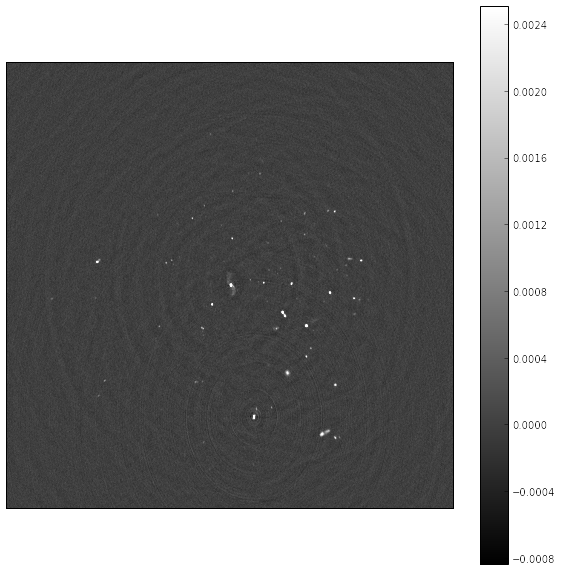

In [11]:
lib.qimplot('output/image', rmin=-2, rmax=+6, cmap='gray')